## Import Libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load data

In [15]:
benin = pd.read_csv("../data/BENIN_EDA_RESULT.csv"); benin["country"]="Benin"
togo = pd.read_csv("../data/TOGO_EDA_RESULT.csv"); togo["country"]="Togo"
sierra = pd.read_csv("../data/SIERRALEONE_EDA_RESULT.csv"); sierra["country"]="SierraLeone"
df = pd.concat([benin, togo, sierra], ignore_index=True)

# summary table (mean, median, std)

In [16]:
summary = df.groupby("country")[["GHI","DNI","DHI"]].agg(["mean","median","std"])
display(summary)

GHI                            DNI                     \
                   mean median         std        mean median         std   
country                                                                     
Benin        229.304617   -0.4  324.306589  162.115284   -0.2  259.358980   
SierraLeone  176.929086   -0.5  272.842353   97.928283   -0.1  195.283796   
Togo         218.728269   -0.2  313.972621  144.591440    0.0  245.333660   

                    DHI                     
                   mean median         std  
country                                     
Benin        108.953421   -0.5  151.920893  
SierraLeone  105.307302   -0.7  153.040378  
Togo         110.778635    0.8  150.658219

# boxplots (one metric at a time)


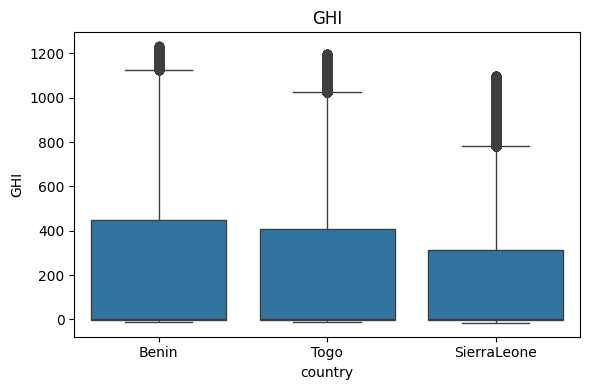

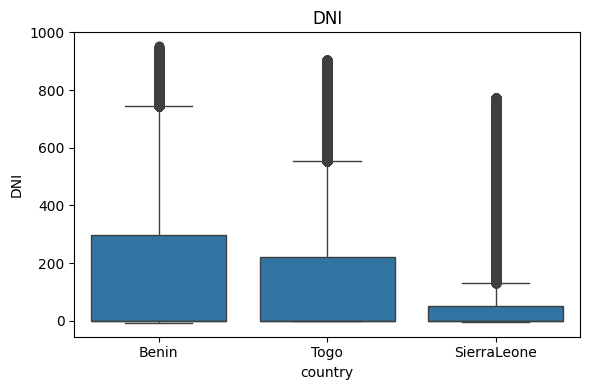

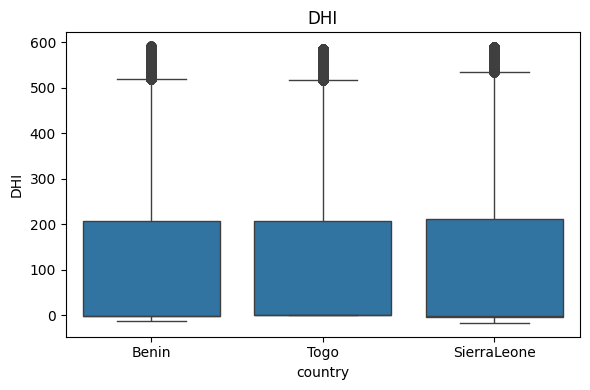

In [17]:
for col in ["GHI","DNI","DHI"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="country", y=col, data=df)
    plt.title(col); plt.tight_layout(); plt.show()

# ANOVA on GHI

In [18]:
groups = [g["GHI"].dropna().values for _,g in df.groupby("country")]
f,p = stats.f_oneway(*groups)
print("ANOVA GHI: F=",round(f,3)," p=",p)

ANOVA GHI: F= 4121.644  p= 0.0


# simple observations
 - Country Benin: highest mean GHI (≈229.3)
 - SierraLeone has lowest mean GHI (≈176.9)
 - Togo displays moderate GHI and DNI values, falling between Benin and Sierra Leone.
 - Standard deviations in GHI are relatively high across all countries (≈270–320), showing notable variability in solar radiation readings.